In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc # for font
# from matplotlib import font_manager
# from matplotlib.ticker import FormatStrFormatter
import os
import pandas as pd
import re # For getting number from a string
import seaborn as sns
# from palettable.colorbrewer.sequential import Blues_9_r

%matplotlib inline

/sw/apps/python3/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_number(filename):
    num_str = filename.split('_')[-1].split('.')[0]
    num_str = ''.join(filter(str.isdigit, num_str))
    return int(num_str)

In [4]:
#############################
#############################

timepoints = [1, 12, 20]
epiboly_stage = [40, 60, 75]

experimental_profiles = [60, 75]

refinement = 0.5

#############################
#############################

In [5]:
grandparent_dir = "/projects/epibolyImg_jstark/ModAndSim/zebrafish/clone_git_zebrafish_epiboly/simulations_on_falcon/lightsheet/volume/for_paper/"
simulation_type = "de_novo_gradient"
# Path to output plots
path_plot_output = grandparent_dir + '/plots/' + simulation_type + "/"

In [6]:
pixel_size = 0.4574419
scaling = 1.0
dt = 0.00126953 if refinement == 0.5 else 0.000317383# time step size

# y_margin_slice = np.array([(1062 - 12 * timepoint) * refinement for timepoint in timepoints])
y_margin_slice = np.array([490, 465, 440])
y_margin = y_margin_slice * pixel_size * scaling / refinement
# y_margin = [(1062 - 12 * timepoint) * pixel_size * scaling for timepoint in timepoints]


In [7]:
y_margin_slice, y_margin

(array([490, 465, 440]), array([448.293062, 425.420967, 402.548872]))

In [8]:
legend_title = "epiboly stage"
colors = ['gray', 'lightseagreen', 'indigo']
colors_exp = ['lightseagreen', 'indigo']

In [9]:
iter_max = 2835680
file_tmax = 'cavg_profile_jslice' + str(iter_max) + '.csv'
t_max = iter_max * dt
print("t_max = ", t_max/60.0, " min")

t_max =  59.99968050666667  min


## AV gradient for different stages

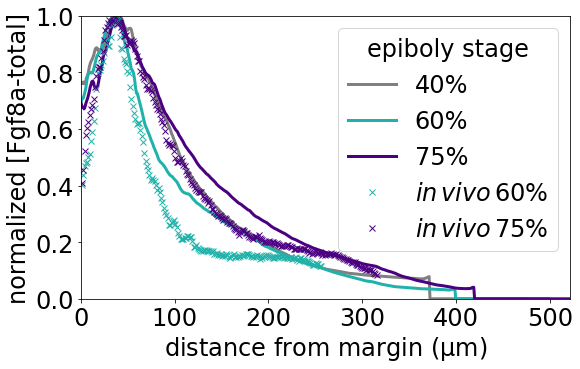

In [11]:
# Create figure and axes objects
# fig, ax = plt.subplots(2, 2)
fig, ax = plt.subplots(1, 1, squeeze=False)
ax = ax.flatten()
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.tight_layout(pad=10) # padding for space between plots

# Set the font style
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')
plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif" : "Arial",
    'mathtext.default': 'regular'
})

# Fontsize
myFontsize = 24
myLineWidth = 3
epsilon = 1e-15 # to avoid division by zero when normalizing by volume

fraction = 'uTotal_4fractions'
# fraction = 'uTotal_ECS'
# fraction = 'uTotal_ECS_AV'
y_label = "normalized [Fgf8a-total]"

time = iter_max * dt / 60.0 # time of iteration in minutes



############################################################################################################

# Loop over tests and plot gradient at same iteration for all tests
for ID_timepoint, timepoint in enumerate(timepoints):
    
    # Set y-margin for axis coordinate origin
    j_min = int(y_margin_slice[ID_timepoint])
    j_max = -1
    
    # Set your path to the folder containing the .csv files
    output_folder_name = "output_TP" + str(timepoint) + "_de_novo_tmax3600_paramSet1";
    PATH = grandparent_dir +  "/" + simulation_type + "/TP" + str(timepoint) + '/build/' + output_folder_name + '/profiles/' + fraction + '/'
    
    # Read .csv file and append to list
    df = np.genfromtxt(PATH + file_tmax, delimiter=',')  
    
    # Get c_max of current profile to normalize each profile to its respective c_max
    c_max = np.max(df[:,1])
    
    # Add a line and specify the color using the ScalarMappable object
    ax[0].plot(df[j_min:j_max, 0] * pixel_size/refinement - y_margin[ID_timepoint], df[j_min:j_max, 1]/c_max, label=str(epiboly_stage[ID_timepoint]) + "%" , color=colors[ID_timepoint], linewidth=myLineWidth)


# ############################################################################################################
# Plot experimental profiles for comparison
for ID_stage, stage in enumerate(experimental_profiles):
#     timepoint = 12

    j_min = int(y_margin_slice[ID_stage])
    j_max = -1
    
    PATH = grandparent_dir + '/experimental_profiles/' + 'Fgf8a_profile_' + str(stage) + 'percEpiboly.csv'

    # Read .csv file and append to list
    df = np.genfromtxt(PATH, delimiter=',')
    # Get c_max of current profile to normalize each profile to its respective c_max
    c_max = np.max(df[:,1])
#     print("experimental c_max of stage ", stage, "% epiboly: ", c_max)

    # Add a line and specify the color using the ScalarMappable object
    ax[0].plot(df[:, 0], df[:, 1]/c_max, 'x', label='$\mathit{in\,vivo}\,$' + str(stage) + '%', color=colors_exp[ID_stage], linewidth=myLineWidth)
#     ax[0].plot(df[j_min:j_max, 0]*pixel_size/refinement - y_margin, df[j_min:j_max, 1]/c_max,'--', label='$\mathit{in vivo}$' + str(stage) + '\,%', color=colors_exp[ID_stage])


############################################################################################################
# Add x and y axis limits, labels, and tick-label size
#     ax[id_folder].set_ylim([0,0.3])
ax[0].set_xlabel('distance from margin ($\mu m$)', fontsize=myFontsize, fontname='Arial')
ax[0].set_ylabel(y_label, fontsize=myFontsize, fontname='Arial')
ax[0].margins(x=0, y=0)
ax[0].tick_params(axis='both', which='major', labelsize=myFontsize)
# ax[0].set_title('$\mathit{t} = $' + str(round(time, 2)) + ' min', fontsize=myFontsize, x = 0.55, y=1.0, pad=-30)

# ax[0].legend(fontsize=myFontsize, bbox_to_anchor=(1.04, 0.5), loc="center left")

# Swap order of legend items so that they are ordered by value
handles, labels = plt.gca().get_legend_handles_labels() #get handles and labels
order = [0, 1, 2, 3, 4] #specify order of items in legend
legend = ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=myFontsize, bbox_to_anchor=(1.0, 1.0), loc="upper right") #add legend to plot
ax[0].get_legend().set_title(legend_title)
legend.get_title().set_fontsize(myFontsize)
None

fig.savefig(path_plot_output + "profiles_3stages_normalized" + str(fraction) + "_insetLegend.pdf", bbox_inches = 'tight')